In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
plt.rcParams.update({'font.size':20})

In [39]:
df = pd.read_csv("./data/simple_benchmarks.csv")
df

,model name,model size,cana timesteps,cana walkers,cana time,cubewalkers timesteps,cubewalkers walkers,cubewalkers time,boolean2 timesteps,boolean2 walkers,boolean2 time
0,Apoptosis Network,41,500,500,6.451820,2500,2500,0.841222,100,100,8.765271
1,Arabidopsis thaliana Cell Cycle,14,500,500,2.190130,2500,2500,0.542933,100,100,7.864087
2,Aurora Kinase A in Neuroblastoma,23,500,500,3.228873,2500,2500,0.509679,100,100,6.531860
3,B bronchiseptica and T retortaeformis coinfection,53,500,500,9.257491,2500,2500,0.655082,100,100,15.689897
4,B cell differentiation,22,500,500,3.074711,2500,2500,0.504514,100,100,5.628456
5,Bordetella bronchiseptica,33,500,500,5.068250,2500,2500,0.590135,100,100,8.301764
6,Bortezomib Responses in U266 Human Myeloma Cells,67,500,500,11.469842,2500,2500,0.694694,100,100,15.602661
7,BT474 Breast Cell Line Long-term ErbB Network,24,500,500,3.639042,2500,2500,0.540123,100,100,8.812533
8,BT474 Breast Cell Line Short-term ErbB Network,16,500,500,2.307525,2500,2500,0.496234,100,100,6.140864
9,Budding Yeast Cell Cycle 2009,18,500,500,2.640313,2500,2500,0.551735,100,100,6.568871


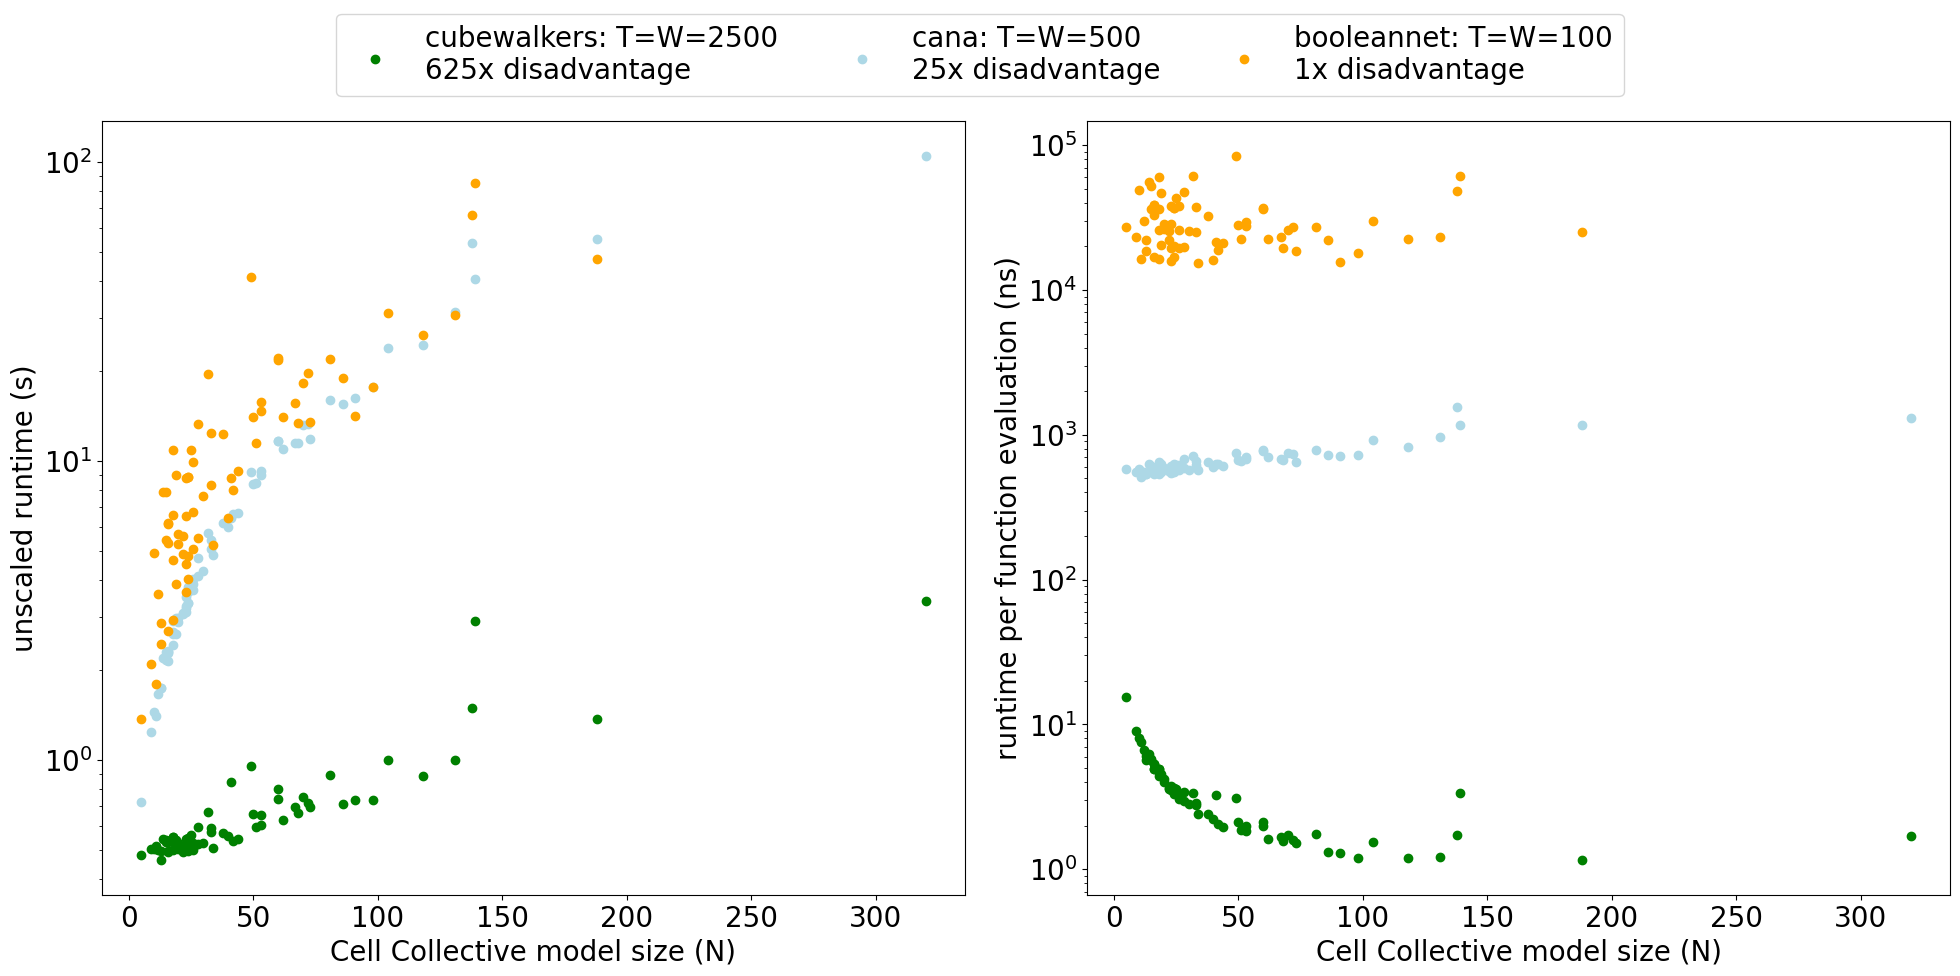

In [121]:
fig,ax = plt.subplots(1,2,figsize=(20, 10))
fig.set_facecolor('white')

boolean2_ops = df['boolean2 timesteps']*df['boolean2 walkers']
cana_ops = df['cana timesteps']*df['cana walkers']
cubewalkers_ops = df['cubewalkers timesteps']*df['cubewalkers walkers']

ax[0].scatter(df['model size'],df['cubewalkers time'], c='green', label=f'cubewalkers: T=W=2500')
ax[0].scatter(df['model size'],df['cana time'], c='lightblue', label=f'cana: T=W=500')
ax[0].scatter(df['model size'],df['boolean2 time'], c= 'orange', label=f'booleannet: T=W=100')
ax[0].set_yscale('log')
ax[0].set_ylabel('unscaled runtime (s)')
ax[0].set_xlabel('Cell Collective model size (N)')

ax[1].set_title(' ')
ax[1].scatter(df['model size'],1e9*df['cubewalkers time']/cubewalkers_ops/df['model size'], c='green', label='cubewalkers')
ax[1].scatter(df['model size'],1e9*df['cana time']/cana_ops/df['model size'], c='lightblue', label='cana')
ax[1].scatter(df['model size'],1e9*df['boolean2 time']/boolean2_ops/df['model size'], c= 'orange', label='booleannet')
ax[1].set_yscale('log')
ax[1].set_ylabel('runtime per function evaluation (ns)')
ax[1].set_xlabel('Cell Collective model size (N)')

fig.legend(["cubewalkers: T=W=2500\n625x disadvantage","cana: T=W=500\n25x disadvantage","booleannet: T=W=100\n1x disadvantage"],loc='upper center',ncols=3)
fig.tight_layout()
plt.subplots_adjust(top=0.875)
fig.savefig('data/corrected_models/figures/benchmarks.png')
fig.tight_layout() # not sure why this needs to be done twice, but without this, the legend is cut off in the pdf
plt.subplots_adjust(top=0.875)
fig.savefig('data/corrected_models/figures/benchmarks.pdf')